In [1]:
pip install pillow numpy matplotlib scikit-learn


In [9]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ========= CONFIGURE THIS =========
IMAGE_DIR = "E:/Hernia"   # <--- CHANGE THIS
N_COLORS_PER_IMAGE = 6
MAX_PIXELS_PER_IMAGE = 150_000
RANDOM_STATE = 42
# ==================================


In [10]:
print(os.listdir(IMAGE_DIR))

['Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 0m17s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 1m13s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 2m40s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 4m09s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 4m58s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 5m42s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 6m14s].png', 'Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 6m22s].png',

In [11]:
def load_image_pixels(path, max_pixels=MAX_PIXELS_PER_IMAGE):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    pixels = arr.reshape(-1, 3).astype(np.float32)

    if len(pixels) > max_pixels:
        idx = np.random.choice(len(pixels), max_pixels, replace=False)
        pixels = pixels[idx]

    return pixels


def get_dominant_colors(pixels, n_colors=N_COLORS_PER_IMAGE):
    kmeans = KMeans(
        n_clusters=n_colors,
        random_state=RANDOM_STATE,
        n_init="auto"
    )
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_.astype(int)
    counts = np.bincount(labels, minlength=n_colors)

    idx_sorted = np.argsort(-counts)
    return centers[idx_sorted], counts[idx_sorted]


def display_color_bar(colors, counts, title=None):
    total = counts.sum()
    ratios = counts / total

    bar_width = 800
    bar_height = 80
    bar = np.zeros((bar_height, bar_width, 3), dtype=np.uint8)

    start = 0
    for color, ratio in zip(colors, ratios):
        end = start + int(ratio * bar_width)
        bar[:, start:end, :] = color
        start = end
    bar[:, start:, :] = colors[-1]

    plt.figure(figsize=(8, 2))
    plt.imshow(bar)
    plt.title(title)
    plt.axis("off")
    plt.show()


Found 10 PNG images.

=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 0m17s].png ===
Dominant colors:
  RGB (152, 99, 94)  -> 26.4%
  RGB (124, 77, 74)  -> 24.6%
  RGB (172, 126, 123)  -> 18.1%
  RGB (90, 50, 44)  -> 11.6%
  RGB (231, 217, 219)  ->  9.7%
  RGB (207, 169, 169)  ->  9.6%


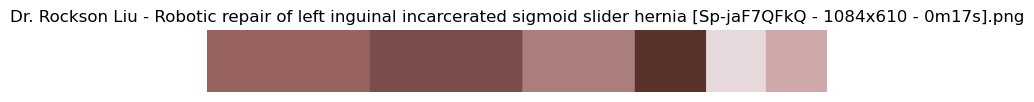


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 1m13s].png ===
Dominant colors:
  RGB (143, 91, 85)  -> 24.9%
  RGB (118, 70, 64)  -> 22.9%
  RGB (171, 115, 106)  -> 20.5%
  RGB (93, 44, 34)  -> 13.3%
  RGB (199, 143, 136)  -> 12.0%
  RGB (228, 188, 184)  ->  6.4%


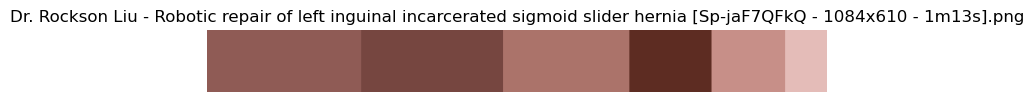


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 2m40s].png ===
Dominant colors:
  RGB (120, 79, 79)  -> 27.6%
  RGB (128, 101, 105)  -> 26.9%
  RGB (100, 57, 56)  -> 15.8%
  RGB (155, 120, 120)  -> 15.6%
  RGB (183, 150, 148)  ->  9.2%
  RGB (215, 190, 192)  ->  4.9%


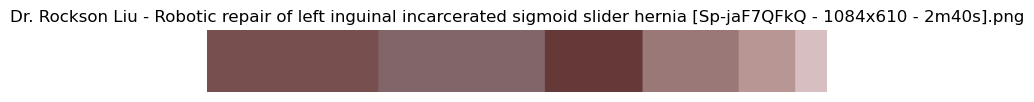


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 4m09s].png ===
Dominant colors:
  RGB (129, 92, 89)  -> 25.0%
  RGB (111, 64, 59)  -> 23.0%
  RGB (163, 118, 114)  -> 20.4%
  RGB (190, 152, 150)  -> 13.4%
  RGB (82, 28, 25)  -> 10.1%
  RGB (223, 197, 198)  ->  8.1%


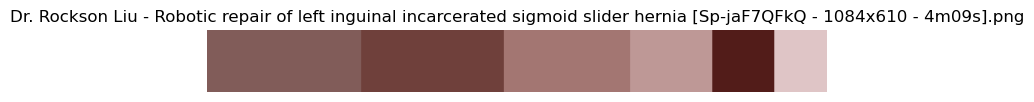


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 4m58s].png ===
Dominant colors:
  RGB (107, 64, 58)  -> 27.2%
  RGB (129, 88, 82)  -> 21.6%
  RGB (79, 40, 36)  -> 14.5%
  RGB (190, 158, 158)  -> 14.5%
  RGB (156, 120, 120)  -> 13.1%
  RGB (224, 202, 201)  ->  9.1%


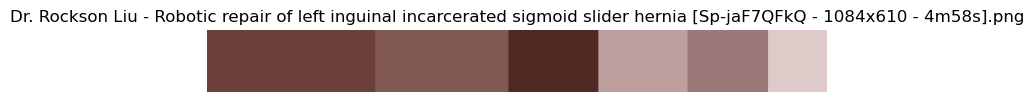


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 5m42s].png ===
Dominant colors:
  RGB (152, 93, 79)  -> 32.0%
  RGB (168, 114, 102)  -> 24.9%
  RGB (130, 67, 55)  -> 20.4%
  RGB (189, 140, 132)  -> 12.2%
  RGB (92, 26, 19)  ->  8.0%
  RGB (224, 192, 186)  ->  2.5%


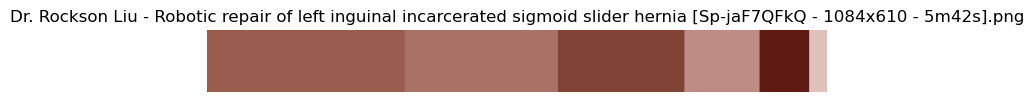


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 6m14s].png ===
Dominant colors:
  RGB (170, 101, 97)  -> 27.4%
  RGB (154, 82, 75)  -> 23.4%
  RGB (189, 121, 115)  -> 22.7%
  RGB (127, 64, 59)  -> 12.1%
  RGB (199, 144, 146)  -> 11.3%
  RGB (81, 31, 28)  ->  3.1%


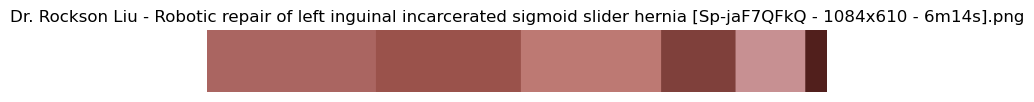


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 6m22s].png ===
Dominant colors:
  RGB (154, 87, 79)  -> 26.1%
  RGB (130, 64, 55)  -> 22.6%
  RGB (178, 112, 102)  -> 22.4%
  RGB (193, 143, 138)  -> 14.0%
  RGB (101, 26, 20)  ->  9.2%
  RGB (224, 184, 182)  ->  5.8%


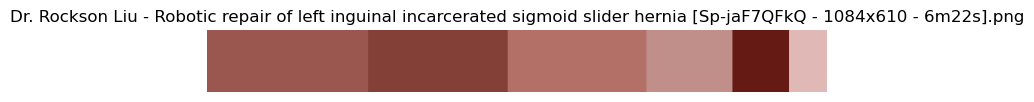


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 7m17s].png ===
Dominant colors:
  RGB (161, 85, 76)  -> 27.5%
  RGB (181, 107, 98)  -> 24.5%
  RGB (132, 63, 55)  -> 20.1%
  RGB (200, 136, 130)  -> 15.4%
  RGB (98, 34, 29)  ->  6.9%
  RGB (223, 179, 180)  ->  5.5%


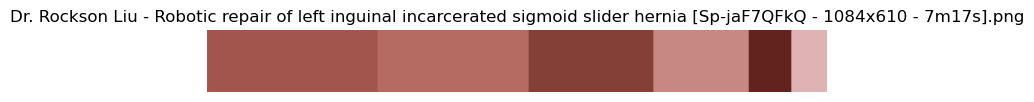


=== Image: Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia [Sp-jaF7QFkQ - 1084x610 - 8m37s].png ===
Dominant colors:
  RGB (182, 97, 86)  -> 27.6%
  RGB (136, 72, 68)  -> 24.8%
  RGB (104, 35, 29)  -> 15.4%
  RGB (194, 137, 134)  -> 13.7%
  RGB (176, 54, 36)  -> 12.5%
  RGB (229, 192, 193)  ->  5.9%


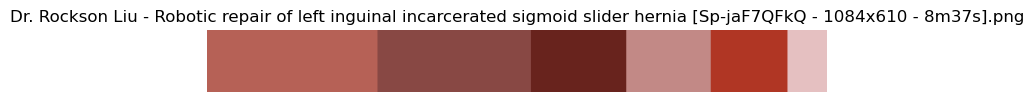

In [12]:
image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, "*.png")))
print(f"Found {len(image_paths)} PNG images.")

all_pixels = []

for path in image_paths:
    fname = os.path.basename(path)
    print("\n=== Image:", fname, "===")

    pixels = load_image_pixels(path)
    all_pixels.append(pixels)

    colors, counts = get_dominant_colors(pixels)

    # Print RGB + %
    total = counts.sum()
    print("Dominant colors:")
    for c, cnt in zip(colors, counts):
        pct = 100 * cnt / total
        print(f"  RGB {tuple(c)}  -> {pct:4.1f}%")

    # Show color spectrum bar
    display_color_bar(colors, counts, title=fname)



=== Combined Palette (All Images) ===
  RGB (128, 71, 64) -> 26.4%
  RGB (174, 98, 86) -> 19.6%
  RGB (187, 136, 133) -> 17.7%
  RGB (139, 101, 101) -> 17.1%
  RGB (94, 39, 34) -> 11.9%
  RGB (222, 191, 191) ->  7.3%


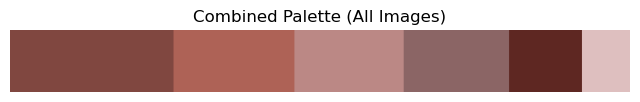

In [13]:
print("\n=== Combined Palette (All Images) ===")

all_pixels_concat = np.vstack(all_pixels)
comb_colors, comb_counts = get_dominant_colors(
    all_pixels_concat,
    n_colors=N_COLORS_PER_IMAGE
)

# Print combined colors
total_comb = comb_counts.sum()
for c, cnt in zip(comb_colors, comb_counts):
    pct = 100 * cnt / total_comb
    print(f"  RGB {tuple(c)} -> {pct:4.1f}%")

# Show combined palette bar
display_color_bar(comb_colors, comb_counts, 
                  title="Combined Palette (All Images)")


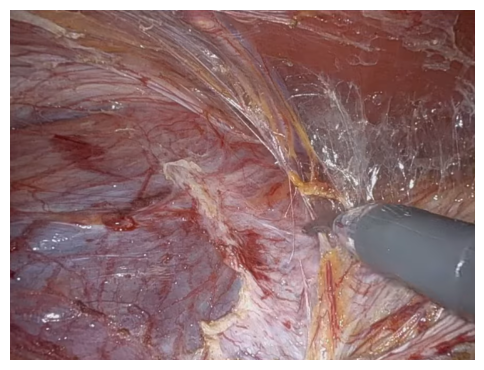

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "E:/Hernia/Dr. Rockson Liu - Robotic repair of left inguinal incarcerated sigmoid slider hernia.png"  # change filename

img = Image.open(img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()
